In [363]:
#Dependencies
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import gmaps

In [323]:
accident_df = pd.read_csv("traffic_accidents.csv")
accident_df['FIRST_OCCURENCE_DATE'] = pd.to_datetime(accident_df['FIRST_OCCURENCE_DATE'])
accident_df['YEAR'], accident_df['MONTH'], accident_df['HOUR'] = accident_df['FIRST_OCCURENCE_DATE'].dt.year, accident_df['FIRST_OCCURENCE_DATE'].dt.month, accident_df['FIRST_OCCURENCE_DATE'].dt.hour 
accident_df['OFFENSE_CATEGORY_ID'] = accident_df['OFFENSE_CATEGORY_ID'].apply(lambda x: x.strip())
accident_df.head()

C:\Users\Lindsay\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,OBJECTID_1,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURENCE_DATE,LAST_OCCURENCE_DATE,REPORTED_DATE,...,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,BICYCLE_IND,PEDESTRIAN_IND,YEAR,MONTH,HOUR
0,200,2.012513e+09,201251274154010,5401,0,TRAF-HIT & RUN,TRAF - ACCIDENT - HIT & RUN,2012-11-02 18:20:00,None,2012-11-03 08:52:00,...,-105.052849,39.682112,4,421,Harvey Park,0,0,2012,11,18
1,201,2.012516e+09,201251634354410,5441,0,TRF-ACCIDENT,TRAF - ACCIDENT,2012-11-05 14:16:00,None,2012-11-05 15:12:00,...,-104.884786,39.653067,3,323,Hampden South,0,0,2012,11,14
2,203,2.012141e+09,201214081754010,5401,0,TRAF-HIT & RUN,TRAF - ACCIDENT - HIT & RUN,2012-04-02 17:00:00,None,2012-04-06 14:37:00,...,-104.986886,39.737147,6,623,Capitol Hill,0,0,2012,4,17
3,204,2.012253e+09,201225335454410,5441,0,TRF-ACCIDENT,TRAF - ACCIDENT,2012-06-11 17:05:00,None,2012-06-11 17:43:00,...,-104.979833,39.703898,3,311,Washington Park West,0,0,2012,6,17
4,206,2.012119e+09,201211878854410,5441,0,TRF-ACCIDENT,TRAF - ACCIDENT,2012-03-23 11:01:00,None,2012-03-23 11:10:00.000001,...,-105.014162,39.740439,1,121,Lincoln Park,0,0,2012,3,11


In [324]:
accidents_by_year = accident_df.groupby('YEAR')['OFFENSE_ID'].count().reset_index()
accidents_by_year = accidents_by_year.rename(columns={'OFFENSE_ID': 'TOTAL_ACCIDENTS'})
accidents_by_year

,YEAR,TOTAL_ACCIDENTS
0,2012,20560
1,2013,21182
2,2014,22444
3,2015,23842
4,2016,24254
5,2017,24616
6,2018,11861


In [318]:
#accident_df.groupby(['year','NEIGHBORHOOD_ID']).OFFENSE_ID.count()

In [325]:
census_df = pd.read_csv("census_neighborhood_demographics_2010.csv")
census_df.head()

,NBHD_ID,NBRHD_NAME,POPULATION_2010,HISPANIC_2010,WHITE_2010,BLACK_2010,NATIVEAM_2010,ASIAN_2010,HAWPACIS_2010,OTHER_2010,...,RENTED_AGE_25_TO_34,RENTED_AGE_35_TO_44,RENTED_AGE_45_TO_54,RENTED_AGE_55_TO_59,RENTED_AGE_60_TO_64,RENTED_AGE_65_TO_74,RENTED_AGE_75_TO_84,RENTED_AGE_85_PLUS,SHAPE_Length,SHAPE_Area
0,32,Hampden,17547,2505,11750,1963,64,726,20,38,...,1363,791,700,304,253,285,200,229,0.200466,0.000768
1,3,Baker,4879,1664,2854,144,43,52,10,7,...,486,235,231,113,64,82,23,7,0.101767,0.000406
2,70,Washington Park,6905,295,6356,28,9,119,3,13,...,329,132,70,31,36,27,6,21,0.090445,0.000411
3,13,Cherry Creek,5589,332,4896,79,17,168,4,3,...,521,261,211,79,92,161,224,207,0.063923,0.000228
4,22,Country Club,3001,94,2740,20,8,77,1,5,...,90,55,34,14,17,9,4,2,0.052865,0.000177


In [369]:
accidents_by_hood = accident_df.groupby(['NEIGHBORHOOD_ID']).OFFENSE_ID.count().reset_index()
accidents_by_hood = accidents_by_hood.rename(columns={'OFFENSE_ID': 'TOTAL_ACCIDENTS'})
accidents_by_hood = pd.merge(accidents_by_hood, census_df[['NBRHD_NAME','POPULATION_2010']], left_on='NEIGHBORHOOD_ID', right_on='NBRHD_NAME')
accidents_by_hood = accidents_by_hood.drop('NBRHD_NAME', axis=1)
accidents_by_hood['ACCIDENTS_PER_PERSON'] = accidents_by_hood['TOTAL_ACCIDENTS']/accidents_by_hood['POPULATION_2010']
accidents_by_hood.head()
#accidents_by_hood.nlargest(20).reset_index()

,NEIGHBORHOOD_ID,TOTAL_ACCIDENTS,POPULATION_2010,ACCIDENTS_PER_PERSON
0,Athmar Park,1719,8898,0.193189
1,Auraria,1285,705,1.822695
2,Baker,7221,4879,1.480016
3,Barnum,1812,6111,0.296514
4,Barnum West,1003,5376,0.186570


In [370]:
accidents_by_hood

,NEIGHBORHOOD_ID,TOTAL_ACCIDENTS,POPULATION_2010,ACCIDENTS_PER_PERSON
0,Athmar Park,1719,8898,0.193189
1,Auraria,1285,705,1.822695
2,Baker,7221,4879,1.480016
3,Barnum,1812,6111,0.296514
4,Barnum West,1003,5376,0.186570
5,Bear Valley,694,8889,0.078074
6,Belcaro,1375,4172,0.329578
7,Berkeley,1633,8112,0.201307
8,CBD,3080,3648,0.844298
9,Capitol Hill,4484,14708,0.304868


In [371]:
neighborhood_df = pd.read_csv("neighborhood_regions.csv")
accidents_by_hood = pd.merge(accidents_by_hood, neighborhood_df, left_on="NEIGHBORHOOD_ID", right_on="NEIGHBORHOOD")
accidents_by_hood = accidents_by_hood.drop('NEIGHBORHOOD', axis=1)
accidents_by_hood.head()

,NEIGHBORHOOD_ID,TOTAL_ACCIDENTS,POPULATION_2010,ACCIDENTS_PER_PERSON,DENVER_REGION
0,Athmar Park,1719,8898,0.193189,West
1,Auraria,1285,705,1.822695,Northwest
2,Baker,7221,4879,1.480016,Central
3,Barnum,1812,6111,0.296514,West
4,Barnum West,1003,5376,0.186570,West


In [378]:
sorted_accidents_by_hood = accidents_by_hood.sort_values(by='ACCIDENTS_PER_PERSON', ascending=False)
sorted_accidents_by_hood

,NEIGHBORHOOD_ID,TOTAL_ACCIDENTS,POPULATION_2010,ACCIDENTS_PER_PERSON,DENVER_REGION,House Value
21,DIA,2156,1165,1.850644,Northeast,142000.0
1,Auraria,1285,705,1.822695,Northwest,NaN
15,Civic Center,2372,1577,1.504122,Central,387000.0
2,Baker,7221,4879,1.480016,Central,337500.0
26,Globeville,3668,3687,0.994847,North,136900.0
8,CBD,3080,3648,0.844298,Central,322000.0
47,Overland,1835,2218,0.827322,South,216700.0
36,Jefferson Park,2063,2552,0.808386,Northwest,332200.0
38,Lincoln Park,4353,6119,0.711391,Central,239500.0
58,Sun Valley,1028,1448,0.709945,West,NaN


In [373]:
house_values_df = pd.read_csv("Neighborhood_House_Value.csv")
accidents_by_hood = pd.merge(accidents_by_hood, house_values_df[['Neighborhood', 'House Value']], left_on="NEIGHBORHOOD_ID", right_on="Neighborhood")
accidents_by_hood = accidents_by_hood.drop('Neighborhood', axis=1)
accidents_by_hood.head(5)

,NEIGHBORHOOD_ID,TOTAL_ACCIDENTS,POPULATION_2010,ACCIDENTS_PER_PERSON,DENVER_REGION,House Value
0,Athmar Park,1719,8898,0.193189,West,181000.0
1,Auraria,1285,705,1.822695,Northwest,NaN
2,Baker,7221,4879,1.480016,Central,337500.0
3,Barnum,1812,6111,0.296514,West,157300.0
4,Barnum West,1003,5376,0.186570,West,172900.0


In [374]:
accidents_by_hood.groupby('DENVER_REGION')['TOTAL_ACCIDENTS'].sum()

DENVER_REGION
Central      39471
East         15917
North        16122
Northeast    16894
Northwest    14004
South        12010
Southeast     9950
Southwest     4815
West         15750
Name: TOTAL_ACCIDENTS, dtype: int64

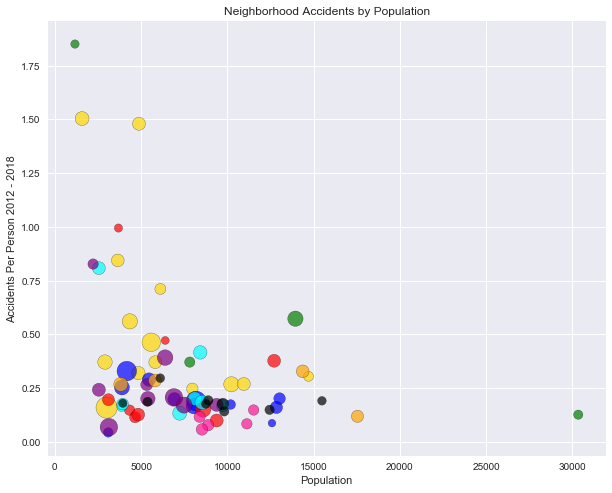

In [376]:
central_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'Central']
east_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'East']
north_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'North']
northeast_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'Northeast']
northwest_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'Northwest']
south_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'South']
southeast_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'Southeast']
southwest_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'Southwest']
west_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'West']

sns.set()
plt.figure(figsize=(10,8))

central_plot = plt.scatter(central_data['POPULATION_2010'], central_data['ACCIDENTS_PER_PERSON'], c='gold', s=central_data['House Value']/2000, alpha=.7, edgecolor='black')
east_plot = plt.scatter(east_data['POPULATION_2010'], east_data['ACCIDENTS_PER_PERSON'], c='blue', s=east_data['House Value']/2000, alpha=.7, edgecolor='black')
north_plot = plt.scatter(north_data['POPULATION_2010'], north_data['ACCIDENTS_PER_PERSON'], c='red', s=north_data['House Value']/2000, alpha=.7, edgecolor='black')
northeast_plot = plt.scatter(northeast_data['POPULATION_2010'], northeast_data['ACCIDENTS_PER_PERSON'], c='green', s=northeast_data['House Value']/2000, alpha=.7, edgecolor='black')
nortwest_plot = plt.scatter(northwest_data['POPULATION_2010'], northwest_data['ACCIDENTS_PER_PERSON'], c='cyan', s=northwest_data['House Value']/2000, alpha=.7, edgecolor='black')
south_plot = plt.scatter(south_data['POPULATION_2010'], south_data['ACCIDENTS_PER_PERSON'], c='purple', s=south_data['House Value']/2000, alpha=.7, edgecolor='black')
southeast_plot = plt.scatter(southeast_data['POPULATION_2010'], southeast_data['ACCIDENTS_PER_PERSON'], c='orange', s=southeast_data['House Value']/2000, alpha=.7, edgecolor='black')
southwest_plot = plt.scatter(southwest_data['POPULATION_2010'], southwest_data['ACCIDENTS_PER_PERSON'], c='deeppink', s=southwest_data['House Value']/2000, alpha=.7, edgecolor='black')
west_plot = plt.scatter(west_data['POPULATION_2010'], west_data['ACCIDENTS_PER_PERSON'], c='black', s=west_data['House Value']/2000, alpha=.7, edgecolor='black')
#plt.scatter(accidents_by_hood['POPULATION_2010'], accidents_by_hood['ACCIDENT_COUNT'])

plt.xlabel('Population')
plt.ylabel('Accidents Per Person 2012 - 2018')
plt.title ('Neighborhood Accidents by Population')

plt.show()
#Create new one with accidents per person

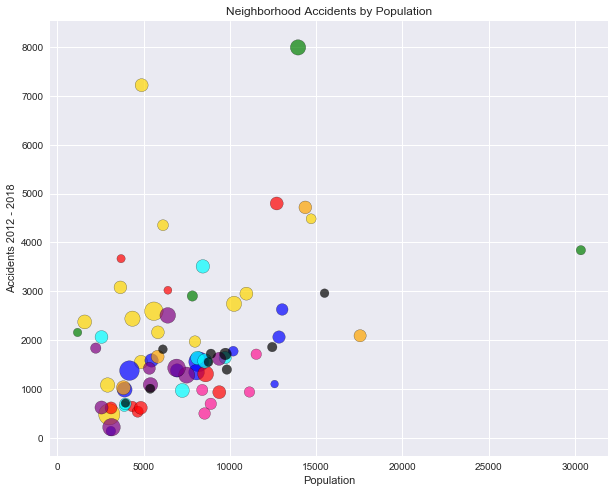

In [377]:
central_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'Central']
east_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'East']
north_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'North']
northeast_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'Northeast']
northwest_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'Northwest']
south_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'South']
southeast_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'Southeast']
southwest_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'Southwest']
west_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'West']

sns.set()
plt.figure(figsize=(10,8))

central_plot = plt.scatter(central_data['POPULATION_2010'], central_data['TOTAL_ACCIDENTS'], c='gold', s=central_data['House Value']/2000, alpha=.7, edgecolor='black')
east_plot = plt.scatter(east_data['POPULATION_2010'], east_data['TOTAL_ACCIDENTS'], c='blue', s=east_data['House Value']/2000, alpha=.7, edgecolor='black')
north_plot = plt.scatter(north_data['POPULATION_2010'], north_data['TOTAL_ACCIDENTS'], c='red', s=north_data['House Value']/2000, alpha=.7, edgecolor='black')
northeast_plot = plt.scatter(northeast_data['POPULATION_2010'], northeast_data['TOTAL_ACCIDENTS'], c='green', s=northeast_data['House Value']/2000, alpha=.7, edgecolor='black')
nortwest_plot = plt.scatter(northwest_data['POPULATION_2010'], northwest_data['TOTAL_ACCIDENTS'], c='cyan', s=northwest_data['House Value']/2000, alpha=.7, edgecolor='black')
south_plot = plt.scatter(south_data['POPULATION_2010'], south_data['TOTAL_ACCIDENTS'], c='purple', s=south_data['House Value']/2000, alpha=.7, edgecolor='black')
southeast_plot = plt.scatter(southeast_data['POPULATION_2010'], southeast_data['TOTAL_ACCIDENTS'], c='orange', s=southeast_data['House Value']/2000, alpha=.7, edgecolor='black')
southwest_plot = plt.scatter(southwest_data['POPULATION_2010'], southwest_data['TOTAL_ACCIDENTS'], c='deeppink', s=southwest_data['House Value']/2000, alpha=.7, edgecolor='black')
west_plot = plt.scatter(west_data['POPULATION_2010'], west_data['TOTAL_ACCIDENTS'], c='black', s=west_data['House Value']/2000, alpha=.7, edgecolor='black')
#plt.scatter(accidents_by_hood['POPULATION_2010'], accidents_by_hood['ACCIDENT_COUNT'])

plt.xlabel('Population')
plt.ylabel('Accidents 2012 - 2018')
plt.title ('Neighborhood Accidents by Population')

plt.show()

In [297]:
accidents_by_month = accident_df.loc[accident_df['YEAR'] < 2018] #Get rid of 2018 data so as not to skew
num_years = accidents_by_month['YEAR'].max() - accidents_by_month['YEAR'].min()
accidents_by_month = accidents_by_month.groupby(['MONTH']).OFFENSE_ID.count().reset_index()
accidents_by_month = accidents_by_month.rename(columns={'OFFENSE_ID': "ACCIDENT_COUNT"})
accidents_by_month['AVG_ACC_PER_YEAR'] = accidents_by_month['ACCIDENT_COUNT']/num_years
accidents_by_month = accidents_by_month.rename(index={'1': 'January'})
accidents_by_month = accidents_by_month.replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8:'August', 9:'September', 10: 'October', 11: 'November', 12: 'December'})
accidents_by_month

,MONTH,ACCIDENT_COUNT,AVG_ACC_PER_YEAR
0,January,11347,2269.4
1,February,10468,2093.6
2,March,10653,2130.6
3,April,10907,2181.4
4,May,11833,2366.6
5,June,11738,2347.6
6,July,10127,2025.4
7,August,11972,2394.4
8,September,12121,2424.2
9,October,12531,2506.2


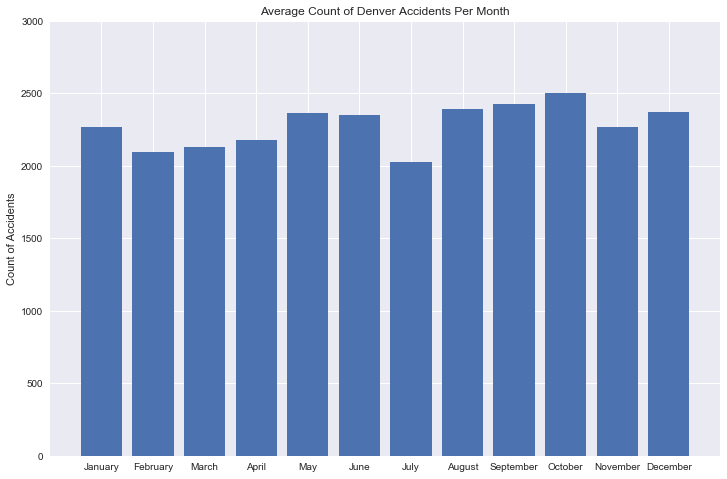

In [298]:
plt.figure(figsize=(12,8))
x_axis = accidents_by_month.index
y_axis = accidents_by_month['AVG_ACC_PER_YEAR']
plt.bar(x_axis, y_axis)
tick_locations = [x for x in accidents_by_month.index]
x_labels = accidents_by_month.MONTH
#x_labels = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 
          # 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
plt.xticks(tick_locations, x_labels)

plt.title ('Average Count of Denver Accidents Per Month')
plt.ylabel('Count of Accidents')
plt.ylim(0, 3000)

plt.show()

In [299]:
accidents_by_hour = accident_df.loc[accident_df['YEAR'] < 2018] #Get rid of 2018 data so as not to skew
num_years = accidents_by_hour['YEAR'].max() - accidents_by_hour['YEAR'].min()
accidents_by_hour = accidents_by_hour.groupby(['HOUR']).OFFENSE_ID.count().reset_index()
accidents_by_hour= accidents_by_hour.rename(columns={'OFFENSE_ID': "ACCIDENT_COUNT"})
accidents_by_hour['AVG_ACC_PER_YEAR'] = accidents_by_hour['ACCIDENT_COUNT']/num_years
#accidents_by_month = accidents_by_month.rename(index={'1': 'January'})
#accidents_by_month = accidents_by_month.replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8:'August', 9:'September', 10: 'October', 11: 'November', 12: 'December'})
accidents_by_hour.head()

,HOUR,ACCIDENT_COUNT,AVG_ACC_PER_YEAR
0,0,2429,485.8
1,1,2408,481.6
2,2,2826,565.2
3,3,1180,236.0
4,4,885,177.0


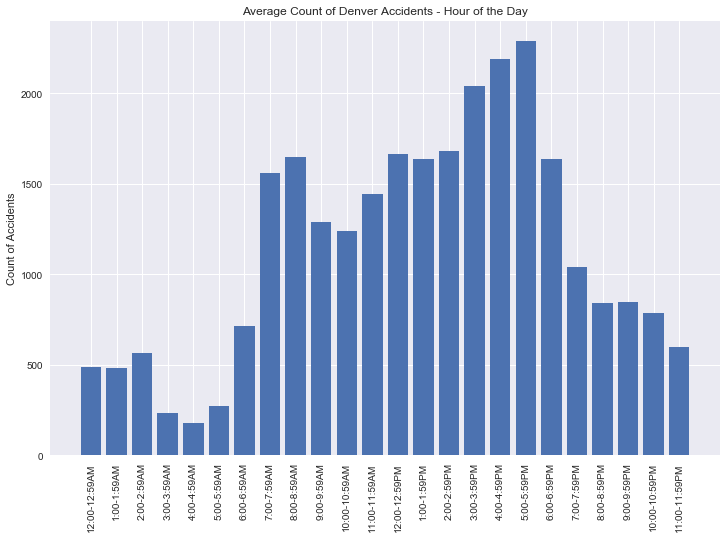

In [360]:
plt.figure(figsize=(12,8))
x_axis = accidents_by_hour.index
y_axis = accidents_by_hour['AVG_ACC_PER_YEAR']
plt.bar(x_axis, y_axis)
tick_locations = [x for x in accidents_by_hour.index]
#x_labels = accidents_by_hour.HOUR
x_labels = ['12:00-12:59AM', '1:00-1:59AM', '2:00-2:59AM', '3:00-3:59AM', '4:00-4:59AM', '5:00-5:59AM', '6:00-6:59AM', '7:00-7:59AM', '8:00-8:59AM',
            '9:00-9:59AM', '10:00-10:59AM', '11:00-11:59AM', '12:00-12:59PM', '1:00-1:59PM', '2:00-2:59PM', '3:00-3:59PM', '4:00-4:59PM', '5:00-5:59PM',
            '6:00-6:59PM', '7:00-7:59PM', '8:00-8:59PM', '9:00-9:59PM', '10:00-10:59PM', '11:00-11:59PM']           
plt.xticks(tick_locations, x_labels, rotation=90)

plt.title ('Average Count of Denver Accidents - Hour of the Day')
plt.ylabel('Count of Accidents')
#plt.ylim(0, 3000)

plt.show()

In [200]:
bike_accs_df = accident_df.loc[accident_df['year'] < 2018] #Get rid of 2018 data so as not to skew
num_years = bike_accs_df['year'].max() - bike_accs_df['year'].min()
bike_accs_df = bike_accs_df.groupby('NEIGHBORHOOD_ID')['BICYCLE_IND'].sum().reset_index()
bike_accs_df['AVG_ACCS_PER_YEAR'] = bike_accs_df['BICYCLE_IND']/num_years
bike_accs_df = bike_accs_df.sort_values(by='AVG_ACCS_PER_YEAR', ascending=False)
bike_accs_df.head(10)

,NEIGHBORHOOD_ID,BICYCLE_IND,AVG_ACCS_PER_YEAR
25,Five Points,130,26.0
9,Capitol Hill,109,21.8
8,CBD,95,19.0
63,Union Station,92,18.4
47,North Capitol Hill,88,17.6
15,Civic Center,76,15.2
40,Lincoln Park,73,14.6
11,Cheesman Park,62,12.4
35,Highland,61,12.2
59,Speer,58,11.6


In [201]:
ped_accs_df = accident_df.loc[accident_df['year'] < 2018] #Get rid of 2018 data so as not to skew
num_years = ped_accs_df['year'].max() - ped_accs_df['year'].min()
ped_accs_df = ped_accs_df.groupby('NEIGHBORHOOD_ID')['PEDESTRIAN_IND'].sum().reset_index()
ped_accs_df['AVG_ACCS_PER_YEAR'] = ped_accs_df['PEDESTRIAN_IND']/num_years
ped_accs_df = ped_accs_df.sort_values(by='AVG_ACCS_PER_YEAR', ascending=False)
ped_accs_df.head(10)

,NEIGHBORHOOD_ID,PEDESTRIAN_IND,AVG_ACCS_PER_YEAR
9,Capitol Hill,203,40.6
63,Union Station,176,35.2
25,Five Points,159,31.8
8,CBD,129,25.8
15,Civic Center,106,21.2
76,Westwood,103,20.6
2,Baker,99,19.8
44,Montbello,89,17.8
11,Cheesman Park,86,17.2
60,Stapleton,86,17.2


In [156]:
offense_df = accident_df.groupby('OFFENSE_CATEGORY_ID')['OFFENSE_ID'].count()
offense_df.head()

OFFENSE_CATEGORY_ID
TRAF - ACCIDENT                   100870
TRAF - ACCIDENT - DUI/DUID          4658
TRAF - ACCIDENT - FATAL              301
TRAF - ACCIDENT - HIT & RUN        39472
TRAF - ACCIDENT - POLICE            1445
Name: OFFENSE_ID, dtype: int64

In [239]:
# mask = ['DUI/DUID' in x for x in accident_df['OFFENSE_CATEGORY_ID']]
dui_mask = accident_df['OFFENSE_CATEGORY_ID'] == 'TRAF - ACCIDENT - DUI/DUID'
dui_df = accident_df[dui_mask]
dui_df = dui_df.loc[dui_df['year'] < 2018]
num_years = dui_df['year'].max() - dui_df['year'].min()
dui_df = dui_df.groupby('NEIGHBORHOOD_ID')['OFFENSE_ID'].count().reset_index()
dui_df = dui_df.rename(columns={'OFFENSE_ID': 'DUI_COUNT'})
dui_df['AVG_DUI_YR'] = dui_df['DUI_COUNT']/num_years
dui_df = dui_df.sort_values(by='DUI_COUNT', ascending=False)
dui_df.head(10)

#ped_accs_df['AVG_ACCS_PER_YEAR'] = ped_accs_df['PEDESTRIAN_IND']/(2017-2012)
#ped_accs_df = ped_accs_df.sort_values(by='AVG_ACCS_PER_YEAR', ascending=False)

,NEIGHBORHOOD_ID,DUI_COUNT,AVG_DUI_YR
60,Stapleton,189,37.8
2,Baker,156,31.2
25,Five Points,151,30.2
9,Capitol Hill,151,30.2
40,Lincoln Park,140,28.0
28,Globeville,139,27.8
76,Westwood,130,26.0
44,Montbello,125,25.0
35,Highland,114,22.8
32,Hampden South,108,21.6


In [238]:
fatal_mask = accident_df['OFFENSE_CATEGORY_ID'] == 'TRAF - ACCIDENT - FATAL'
fatal_df = accident_df[fatal_mask]
fatal_df = fatal_df.loc[fatal_df['year']<2018]
num_years = fatal_df['year'].max() - fatal_df['year'].min()
fatal_df = fatal_df.groupby('NEIGHBORHOOD_ID')['OFFENSE_ID'].count().reset_index()
fatal_df = fatal_df.rename(columns={'OFFENSE_ID': 'FATAL_COUNT'})
fatal_df['AVG_FATAL_YR'] = fatal_df['FATAL_COUNT']/num_years
fatal_df = fatal_df.sort_values(by='AVG_FATAL_YR', ascending=False)
fatal_df.head(10)

,NEIGHBORHOOD_ID,FATAL_COUNT,AVG_FATAL_YR
52,Stapleton,18,3.6
68,Westwood,11,2.2
38,Lincoln Park,11,2.2
0,Athmar Park,8,1.6
26,Gateway - Green Valley Ranch,8,1.6
27,Globeville,8,1.6
42,Montbello,8,1.6
23,Elyria Swansea,8,1.6
51,Speer,7,1.4
40,Mar Lee,7,1.4


In [237]:
hr_mask = accident_df['OFFENSE_CATEGORY_ID'] == 'TRAF - ACCIDENT - HIT & RUN'
hr_df = accident_df[hr_mask]
hr_df = hr_df.loc[hr_df['year']<2018]
num_years = hr_df['year'].max() - hr_df['year'].min()
hr_df = hr_df.groupby('NEIGHBORHOOD_ID')['OFFENSE_ID'].count().reset_index()
hr_df = hr_df.rename(columns={'OFFENSE_ID': 'HIT_RUN_COUNT'})
hr_df['AVG_HR_YR'] = hr_df['HIT_RUN_COUNT']/num_years
hr_df = hr_df.sort_values(by='AVG_HR_YR', ascending=False)
hr_df.head(10)

,NEIGHBORHOOD_ID,HIT_RUN_COUNT,AVG_HR_YR
2,Baker,1535,307.0
60,Stapleton,1532,306.4
25,Five Points,1284,256.8
9,Capitol Hill,1242,248.4
76,Westwood,1117,223.4
44,Montbello,1027,205.4
40,Lincoln Park,1011,202.2
35,Highland,846,169.2
63,Union Station,829,165.8
8,CBD,809,161.8
